## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on=["Mouse ID","Mouse ID"])
# Display the data table for preview
combined_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumour Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1

In [2]:
# Checking the number of records.
line_count = combined_data["Mouse ID"].count()
print("Number of total records in the combined data set is " + str(line_count) + ".")

# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
print("Number of mice in the combined data set is " + str(mice_count) + ".")

Number of total records in the combined data set is 1893.
Number of mice in the combined data set is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

group_timepoint = combined_data.groupby(["Mouse ID", "Timepoint"])
duplicate_timepoint = group_timepoint["Timepoint"].count()
df = pd.DataFrame({"Count": duplicate_timepoint})
df2 = df.loc[df["Count"]>=2]
df2

Count
Mouse ID Timepoint       
g989     0              2
         5              2
         10             2
         15             2
         20             2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = combined_data.loc[combined_data["Mouse ID"]=="g989",:]
duplicate_mouse


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumour Volume (mm3)  Metastatic Sites  
908            45.000000                 0  
909            45.000000                 0  
910            48.786801                 0  
911            47.570392                 0  
912            51.745156                 0  
913            49.880528                 0  
914            51.325852                 1  
915            53.442020                 0  
916            55.326122                 1  
917            54.657650                 1  
918            56.045564                 1  
919            59.082294                 1  
920            62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"])
cleaned_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumour Volume (mm3)  Metastatic Sites  
0               45.000000                 0  
1               38.825898                 0  
2               35.014271                 1  
3               34.223992                 1  
4               32.997729                 1  
...                   ...               ...  
1888            63.145652                 2  
1889            65.841013                 3  
1890            69.176246                 4  
1891            70.314904                 4  
1892            73.867845                 4  

[1888 rows x 8 columns]

In [6]:
# Checking the number of records in the clean Data Frame.
line_count2 = cleaned_data["Mouse ID"].count()
print("Number of total records in the combined data set is " + str(line_count2) + ".")

# Checking the number of mice in the clean Data Frame.
mice_count2 = len(cleaned_data["Mouse ID"].unique())
print("Number of mice in the combined data set is " + str(mice_count2) + ".")


Number of total records in the combined data set is 1888.
Number of mice in the combined data set is 249.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

tv_mean = cleaned_data.groupby(["Drug Regimen"]).mean()["Tumour Volume (mm3)"]
tv_median = cleaned_data.groupby(["Drug Regimen"]).median()["Tumour Volume (mm3)"]
tv_variance = cleaned_data.groupby(["Drug Regimen"]).var()["Tumour Volume (mm3)"]
tv_std = cleaned_data.groupby(["Drug Regimen"]).std()["Tumour Volume (mm3)"]
tv_sem = cleaned_data.groupby(["Drug Regimen"]).sem()["Tumour Volume (mm3)"]

summary_stat = pd.DataFrame({"Mean of tumour volume": tv_mean,
                             "Median of tumour volume": tv_median,
                             "Variance of tumour volume": tv_variance,
                             "Standard deviation of tumour volume": tv_std,
                             "SEM of tumour volume": tv_sem})

summary_stat


Mean of tumour volume  Median of tumour volume  \
Drug Regimen                                                   
Capomulin                 40.675741                41.557809   
Ceftamin                  52.591172                51.776157   
Infubinol                 52.884795                51.820584   
Ketapril                  55.235638                53.698743   
Naftisol                  54.331565                52.509285   
Placebo                   54.033581                52.288934   
Propriva                  52.393463                50.909965   
Ramicane                  40.216745                40.673236   
Stelasyn                  54.233149                52.431737   
Zoniferol                 53.236507                51.818479   

              Variance of tumour volume  Standard deviation of tumour volume  \
Drug Regimen                                                                   
Capomulin                     24.947764                             4.994774   
Ceftamin                      39.290177                             6.268188   
Infubinol                     43.128684                             6.567243   
Ketapril                      68.553577                             8.279709   
Naftisol                      66.173479                             8.134708   
Placebo                       61.168083                             7.821003   
Propriva                      43.138803                             6.568014   
Ramicane                      23.486704                             4.846308   
Stelasyn                      59.450562                             7.710419   
Zoniferol                     48.533355                             6.966589   

              SEM of tumour volume  
Drug Regimen                        
Capomulin                 0.329346  
Ceftamin                  0.469821  
Infubinol                 0.492236  
Ketapril                  0.603860  
Naftisol                  0.596466  
Placebo                   0.581331  
Propriva                  0.525862  
Ramicane                  0.320955  
Stelasyn                  0.573111  
Zoniferol                 0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stat2 =cleaned_data.aggregate({"Tumour Volume (mm3)": ["mean","median","var","std","sem"]})
summary_stat2

Tumour Volume (mm3)
mean              50.449276
median            48.951421
var               79.291277
std                8.904565
sem                0.204933

## Bar and Pie Charts

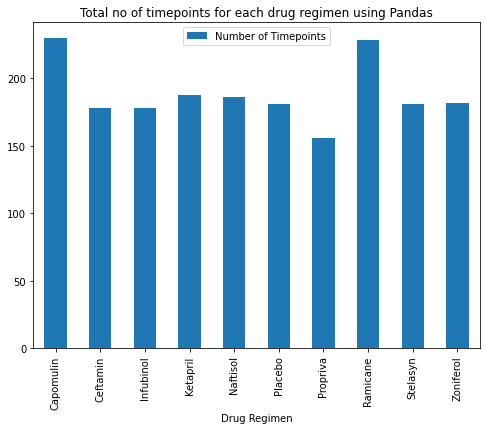

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Timepoint_drug_regimen = cleaned_data.groupby(["Drug Regimen"]).count()["Timepoint"]

drug_regimen_timepoint = pd.DataFrame({"Number of Timepoints": Timepoint_drug_regimen})
                                      
drug_regimen_timepoint.plot(kind="bar", figsize = (8,6))

plt.title("Total no of timepoints for each drug regimen using Pandas")
plt.show()




Text(0, 0.5, 'Number of Timepoints')

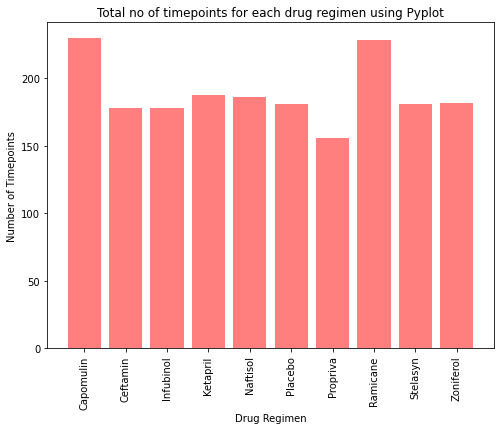

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(Timepoint_drug_regimen))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,6))

plt.bar(x_axis, Timepoint_drug_regimen, color = 'r', alpha = 0.5, align = "center")

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.title("Total no of timepoints for each drug regimen using Pyplot")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


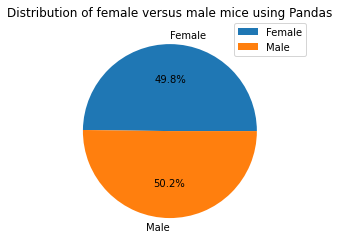

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Mouse_ID_gender = mouse_metadata.groupby(["Sex"]).count()["Mouse ID"]

gender_Mice = pd.DataFrame({"Count": Mouse_ID_gender})

pie1 = gender_Mice.plot(kind="pie", y = "Count", autopct = "%1.1f%%", ylabel = "", title = "Distribution of female versus male mice using Pandas")
pie1.legend(bbox_to_anchor=(1.15, 1.02), loc="upper right")


plt.show()

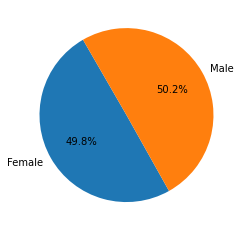

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_labels = ["Female" , "Male"]

count = Mouse_ID_gender

plt.pie(count, labels=Gender_labels, autopct="%1.1f%%", startangle=120)
plt.title = "Distribution of female versus male mice using Pyplot"
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_data = cleaned_data.groupby(["Mouse ID"])
latest_timepoint = grouped_data["Timepoint"].max()
latest_timepoint_per_mouse = pd.DataFrame({"Greatest Timepoint": latest_timepoint})


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
TV_latest_timepoint_per_mouse = latest_timepoint_per_mouse.merge(cleaned_data, left_on = ["Mouse ID", "Greatest Timepoint"], right_on = ["Mouse ID", "Timepoint"])
TV_latest_timepoint_per_mouse



Mouse ID  Greatest Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203                  45    Infubinol  Female          20          23   
1       a251                  45    Infubinol  Female          21          25   
2       a262                  45      Placebo  Female          17          29   
3       a275                  45     Ceftamin  Female          20          28   
4       a366                  30     Stelasyn  Female          16          29   
..       ...                 ...          ...     ...         ...         ...   
244     z435                  10     Propriva  Female          12          26   
245     z578                  45     Ramicane    Male          11          16   
246     z581                  45    Infubinol  Female          24          25   
247     z795                  45     Naftisol  Female          13          29   
248     z969                  45     Naftisol    Male           9          30   

     Timepoint  Tumour Volume (mm3)  Metastatic Sites  
0           45            67.973419                 2  
1           45            65.525743                 1  
2           45            70.717621                 4  
3           45            62.999356                 3  
4           30            63.440686                 1  
..         ...                  ...               ...  
244         10            48.710661                 0  
245         45            30.638696                 0  
246         45            62.754451                 3  
247         45            65.741070                 3  
248         45            73.867845                 4  

[249 rows x 9 columns]

In [22]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)

tumour_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumour volumes

trt1 = TV_latest_timepoint_per_mouse.loc[TV_latest_timepoint_per_mouse["Drug Regimen"]=="Capomulin",:]
trt2 = TV_latest_timepoint_per_mouse.loc[TV_latest_timepoint_per_mouse["Drug Regimen"]=="Ramicane",:]
trt3 = TV_latest_timepoint_per_mouse.loc[TV_latest_timepoint_per_mouse["Drug Regimen"]=="Infubinol",:]
trt4 = TV_latest_timepoint_per_mouse.loc[TV_latest_timepoint_per_mouse["Drug Regimen"]=="Ceftamin",:]


trt1.sort_values(by = ["Tumour Volume (mm3)"] ,ascending = True)
trt2.sort_values(by = ["Tumour Volume (mm3)"] ,ascending = True)
trt3.sort_values(by = ["Tumour Volume (mm3)"] ,ascending = True)
trt4.sort_values(by = ["Tumour Volume (mm3)"] ,ascending = True)


    
# add subset 

tumour_vol.append(trt1["Tumour Volume (mm3)"])
tumour_vol.append(trt2["Tumour Volume (mm3)"])
tumour_vol.append(trt3["Tumour Volume (mm3)"])
tumour_vol.append(trt4["Tumour Volume (mm3)"])

tumour_vol
    
# Determine outliers using upper and lower bounds

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumour Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumour Volume (mm3), dtype: float64,
 0      67.9

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
